In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
df_2=pd.read_csv("https://drive.google.com/uc?id=15KJKTtlrvsILcPp9cASDm-AMhhv5Cq-G")
df=pd.read_csv("https://drive.google.com/uc?id=1stu-JrwFFcDRcFRMXtDDfhrX_ghOpuwD")

In [3]:
df.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df_2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
df_2.shape

(230, 3)

In [6]:
df.shape

(271116, 15)

# Add the region Column to the position of NOC

In [7]:
r_col=df["NOC"].map(df_2.set_index("NOC")["region"])
df.insert(8,"region",r_col)

# Remove Unnecessary Columns

In [9]:
df.drop(["NOC","Games"],axis=1,inplace=True)

In [10]:
df.head(3)

,ID,Name,Gender,Age,Height,Weight,Team,region,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [11]:
df.isnull().sum()

ID             0
Name           0
Gender         0
Age         9474
Height     60171
Weight     62875
Team           0
region       370
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

# Handling Null Values

In [12]:
def fillna(x):
    df[x].fillna(np.mean(df[x]),inplace=True)

In [13]:
fillna("Age")
fillna("Height")
fillna("Weight")

In [14]:
df["Age"]=df["Age"].astype(np.int64)

In [15]:
df.isnull().sum()

ID             0
Name           0
Gender         0
Age            0
Height         0
Weight         0
Team           0
region       370
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

# Transforming categorical values into numerical representations.

In [16]:
df["Medal"].value_counts()

Medal
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64

In [17]:
df["Medal"].replace([np.NaN,"Gold","Silver","Bronze"],(0,1,2,3),inplace=True)

In [18]:
df["Medal"].value_counts()

Medal
0    231333
1     13372
3     13295
2     13116
Name: count, dtype: int64

In [19]:
df["Medal"]=df.Medal.astype(np.int64)

In [20]:
df["Medal"].value_counts()

Medal
0    231333
1     13372
3     13295
2     13116
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   region  270746 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   271116 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 29.0+ MB


In [22]:
df.isnull().sum()

ID          0
Name        0
Gender      0
Age         0
Height      0
Weight      0
Team        0
region    370
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

In [23]:
df.head()

,ID,Name,Gender,Age,Height,Weight,Team,region,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.00000,80.000000,China,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23,170.00000,60.000000,China,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24,175.33897,70.702393,Denmark,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34,175.33897,70.702393,Denmark/Sweden,Denmark,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21,185.00000,82.000000,Netherlands,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0





# Remove unnecessary phrases from the 'Event' column.

In [24]:
for i,j in zip(df["Sport"],range(len(df["Event"]))):

    df["Event"][j]=re.sub(f"{i}\s","",df["Event"][j])


Streaming output truncated to the last 5000 lines.
<ipython-input-24-80d908341b78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Event"][j]=re.sub(f"{i}\s","",df["Event"][j])
<ipython-input-24-80d908341b78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Event"][j]=re.sub(f"{i}\s","",df["Event"][j])
<ipython-input-24-80d908341b78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Event"][j]=re.sub(f"{i}\s","",df["Event"]

In [25]:
df.head()

,ID,Name,Gender,Age,Height,Weight,Team,region,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.00000,80.000000,China,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,2,A Lamusi,M,23,170.00000,60.000000,China,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24,175.33897,70.702393,Denmark,Denmark,1920,Summer,Antwerpen,Football,Men's Football,0
3,4,Edgar Lindenau Aabye,M,34,175.33897,70.702393,Denmark/Sweden,Denmark,1900,Summer,Paris,Tug-Of-War,Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21,185.00000,82.000000,Netherlands,Netherlands,1988,Winter,Calgary,Speed Skating,Women's 500 metres,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  int64  
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   region  270746 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
 13  Medal   271116 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 29.0+ MB


# Save or export the cleaned dataset.

In [27]:
df.to_csv("Clean_Olympics_Dataset.csv")

# Data Analysis

1. Show the relationship between Age and Weight

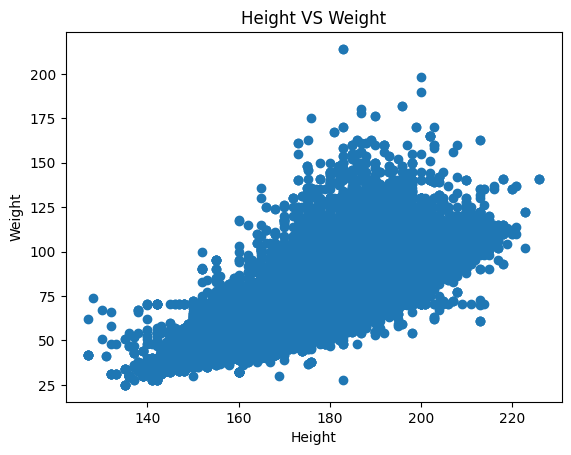

In [28]:
plt.title("Height VS Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
#plt.legend()
plt.scatter(df["Height"],df["Weight"])
plt.show()

2. Determine the number of participants in sports categorized by gender (Male and Female).

<Axes: xlabel='Gender'>

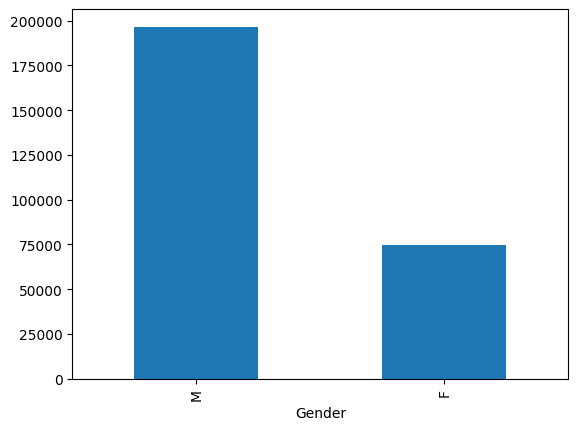

In [32]:
df["Gender"].value_counts().plot.bar(df["Gender"])

3. Calculate the count of participants in sports categorized by gender (Male and Female) for each respective season.

<Axes: xlabel='Season,Gender'>

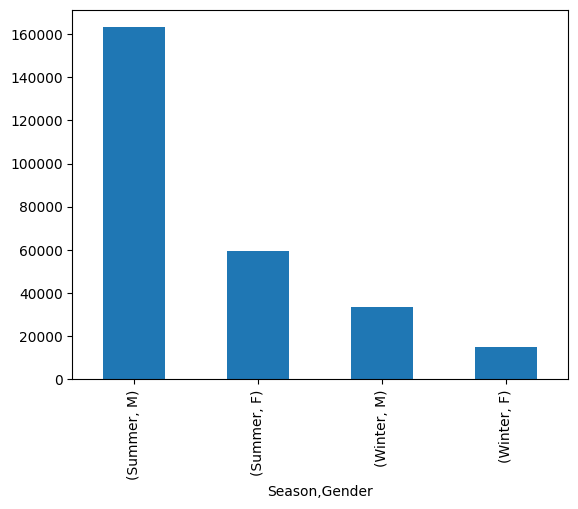

In [31]:
df["Gender"].groupby(df["Season"]).value_counts().plot.bar(df["Gender"])